> **KNN Classifier without PCA :**Used k-Nearest Neighbor (KNN) to classify the Optdigits dataset with k = {1, 3, 5, 7}. Printed the error rate on the test set for each value of k.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
training_data = pd.read_csv(r"/content/optdigits_train.txt",header = None)
testing_data = pd.read_csv(r"/content/optdigits_test.txt",header = None)
X_train = training_data.iloc[:,:64]
Y_train = training_data.iloc[:,64]
X_test = testing_data.iloc[:,:64]
Y_test = testing_data.iloc[:,64]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1500, 64)
(1500,)
(297, 64)
(297,)


In [ ]:
def knn(X_train,Y_train,X_test,k):
  knn1 = KNeighborsClassifier(n_neighbors = k)
  knn1.fit(X_train,Y_train)
  pred1 = knn1.predict(X_test)
  return pred1

In [ ]:
# Printing out the error rates
def ErrorRate(pred, real):
  if len(pred)!= len(real):
    return "There is some error with the input. They have different number of elements."
  else:
    error = 0
    n = len(pred)
    for i in range(n):
      if pred[i] != real[i]:
        error+=1
    return error/n


In [ ]:
# test run for the question 1
for i in [1,3,5,7]:
  pred = knn(X_train,Y_train,X_test,i)
  print("The error rate for k = {} is :".format(i),ErrorRate(pred,Y_test))

The error rate for k = 1 is : 0.05387205387205387
The error rate for k = 3 is : 0.04040404040404041
The error rate for k = 5 is : 0.04377104377104377
The error rate for k = 7 is : 0.05387205387205387



>**PCA Implementation** Implemented our own version of Principal Component Analysis (PCA) and apply it the Optdigits training data.



In [ ]:
# Part 1 calculating the Covariance matrix, for the data and then eigenvalues,
# eigenvectors for the covariance matrix.
cov_matrix = np.cov(X_train.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

<Axes: >

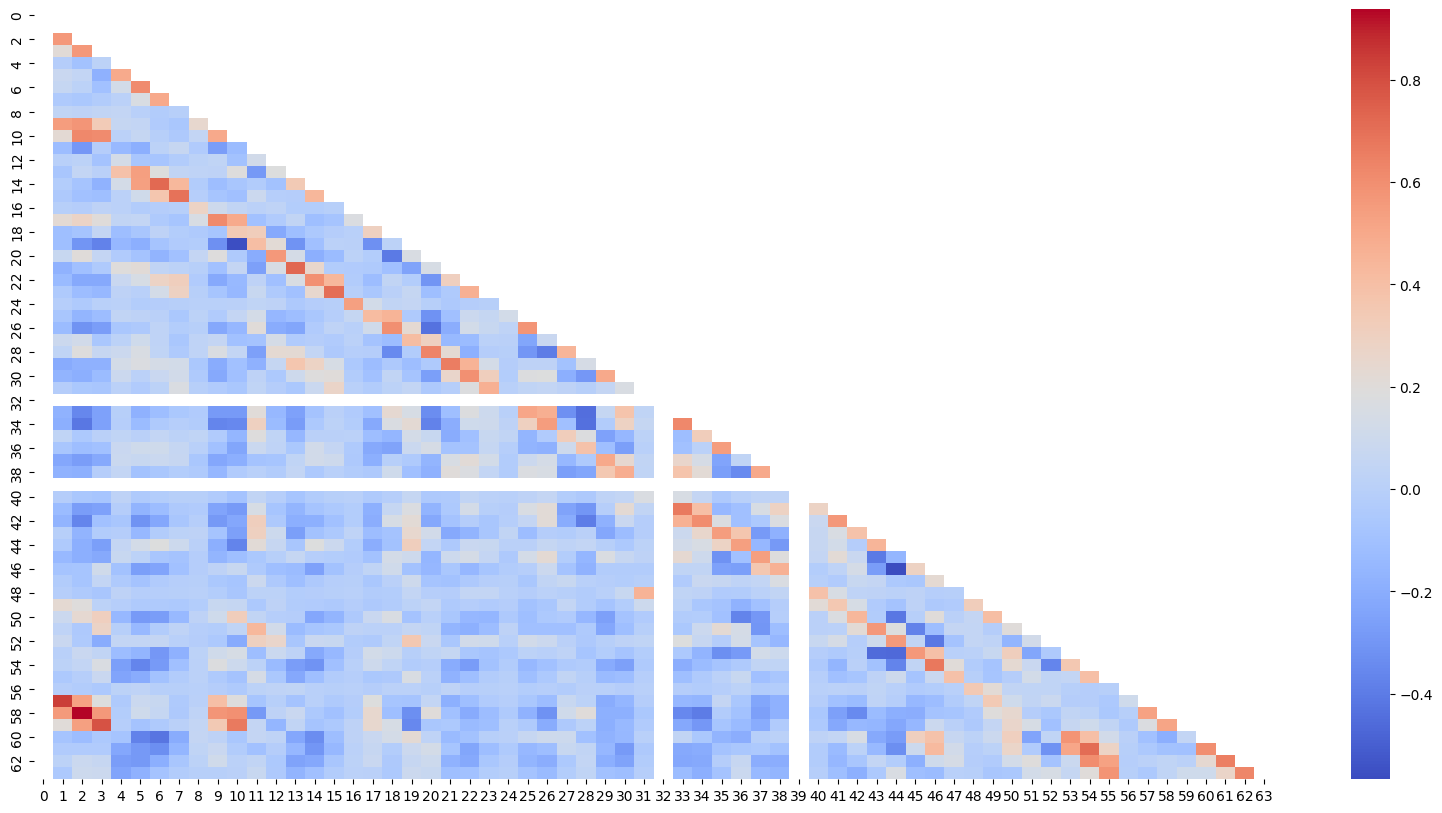

In [ ]:
# creating heatmap of data just for fun
import seaborn as sns
corelation_matrix = X_train.corr()
mask = np.triu(np.ones_like(corelation_matrix))
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(corelation_matrix, mask = mask,ax=ax,cmap='coolwarm')

In [ ]:
# Part 2 sorting the eigenvectors accroing to eignevalues.
indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[indices]
sorted_vectors = eigenvectors[:,indices]


>  **KNN Classifier with PCA** Generated a plot of proportion of variance and selected the minimum value of (K) of eigenvectors that explain at
least 90% of the variance.

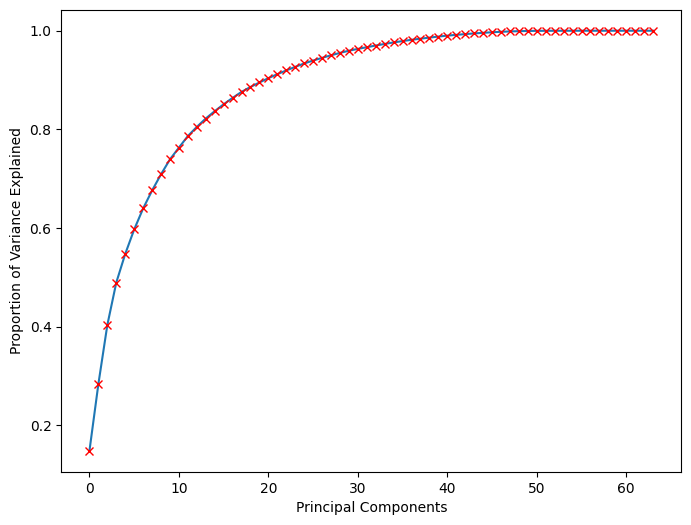

In [ ]:
# Creating the proportion of variance against vectors.
total_var = np.sum(eigenvalues)
prop_var = [eigenvalues[i]/total_var for i in range(len(eigenvalues))]
cumulative_var = np.cumsum(prop_var)
plt.figure(figsize=(8, 6))
plt.plot(range(len(eigenvalues)), cumulative_var, label='Cumulative explained variance',marker='x',markeredgecolor='red')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Components')
plt.show()


In [ ]:
k = 0
for i in cumulative_var:
  k+=1
  if i >= 0.9:
    break
k

21

In [ ]:
# Part 3: let's assume that k = 21 (so we will be taking only the top 21 features)
imp_features = sorted_vectors[:, :k]
new_x_train = np.dot(X_train, imp_features)
new_x_test = np.dot(X_test,imp_features)

In [ ]:
# test run for the question 1
for i in [1,3,5,7]:
  pred = knn(new_x_train,Y_train,new_x_test,i)
  print("The error rate for k = {} is :".format(i),ErrorRate(pred,Y_test))

The error rate for k = 1 is : 0.04713804713804714
The error rate for k = 3 is : 0.04713804713804714
The error rate for k = 5 is : 0.05387205387205387
The error rate for k = 7 is : 0.05387205387205387



> **Component Plotting :** Projected both the training and test data to R2 using only the first two principal components.



Text(0.5, 1.0, 'Presentation of data points as per top 2 Principal components')

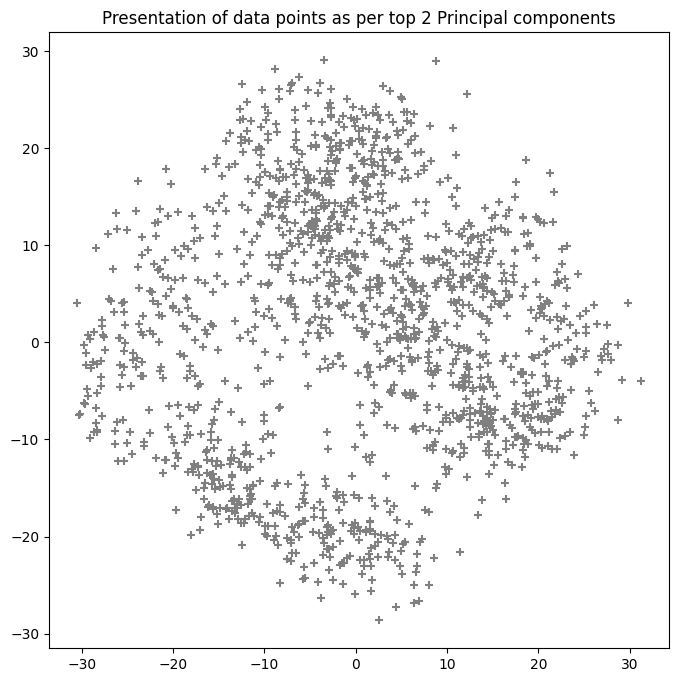

In [ ]:
plot_x_data = new_x_train[:,0]
plot_y_data = new_x_train[:,1]
plt.figure(figsize = (8,8))
plt.scatter(plot_x_data, plot_y_data,marker='+',color='grey')
plt.title('Presentation of data points as per top 2 Principal components')

In [ ]:
X_axis = []
Y_axis = []
X_axis.append([plot_x_data[i] for i in range(len(plot_x_data)) if Y_train[i] == 0 ])
X_axis.append([plot_x_data[i] for i in range(len(plot_x_data)) if Y_train[i] == 1 ])
X_axis.append([plot_x_data[i] for i in range(len(plot_x_data)) if Y_train[i] == 2 ])
X_axis.append([plot_x_data[i] for i in range(len(plot_x_data)) if Y_train[i] == 3 ])
X_axis.append([plot_x_data[i] for i in range(len(plot_x_data)) if Y_train[i] == 4 ])
X_axis.append([plot_x_data[i] for i in range(len(plot_x_data)) if Y_train[i] == 5 ])
X_axis.append([plot_x_data[i] for i in range(len(plot_x_data)) if Y_train[i] == 6 ])
X_axis.append([plot_x_data[i] for i in range(len(plot_x_data)) if Y_train[i] == 7 ])
X_axis.append([plot_x_data[i] for i in range(len(plot_x_data)) if Y_train[i] == 8 ])
X_axis.append([plot_x_data[i] for i in range(len(plot_x_data)) if Y_train[i] == 9 ])

Y_axis.append([plot_y_data[i] for i in range(len(plot_y_data)) if Y_train[i] == 0 ])
Y_axis.append([plot_y_data[i] for i in range(len(plot_y_data)) if Y_train[i] == 1 ])
Y_axis.append([plot_y_data[i] for i in range(len(plot_y_data)) if Y_train[i] == 2 ])
Y_axis.append([plot_y_data[i] for i in range(len(plot_y_data)) if Y_train[i] == 3 ])
Y_axis.append([plot_y_data[i] for i in range(len(plot_y_data)) if Y_train[i] == 4 ])
Y_axis.append([plot_y_data[i] for i in range(len(plot_y_data)) if Y_train[i] == 5 ])
Y_axis.append([plot_y_data[i] for i in range(len(plot_y_data)) if Y_train[i] == 6 ])
Y_axis.append([plot_y_data[i] for i in range(len(plot_y_data)) if Y_train[i] == 7 ])
Y_axis.append([plot_y_data[i] for i in range(len(plot_y_data)) if Y_train[i] == 8 ])
Y_axis.append([plot_y_data[i] for i in range(len(plot_y_data)) if Y_train[i] == 9 ])


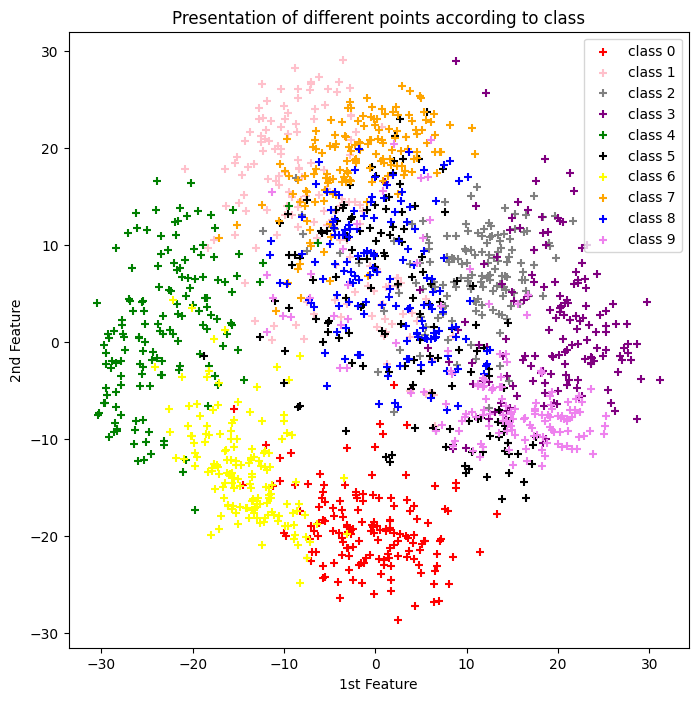

In [ ]:
clr = ['red','pink','grey','purple','green','black','yellow','orange','blue','violet']

plt.figure(figsize  = (8,8))
for i in range(10):
  plt.scatter(X_axis[i],Y_axis[i],marker='+',color = clr[i],label = 'class ' + str(i))
plt.legend()
plt.xlabel("1st Feature")
plt.ylabel("2nd Feature")
plt.title('Presentation of different points according to class')
plt.show()